<a href="https://colab.research.google.com/github/lucashenrs/QuarentenaDadosAlura/blob/master/aulas123_with_challenges.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Início

In [16]:
print('Hello World')

Hello World


Importando Pandas e DataFrames do MovieLens

#Aula 1


In [0]:
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
#filmes = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula1/ml-latest-small/movies.csv')
#filmes = pd.read_csv('movies.csv')
filmes = pd.read_csv('https://raw.githubusercontent.com/lucashenrs/QuarentenaDadosAlura/master/Aula_1_2/movies.csv')

In [19]:
filmes.columns = ['filmeId', 'titulo', 'gener']
filmes.head()

,filmeId,titulo,gener
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [0]:
avaliacoes = pd.read_csv('https://raw.githubusercontent.com/lucashenrs/QuarentenaDadosAlura/master/Aula_1_2/ratings.csv')


Alterando nomes das colunas

In [21]:
#verificando as colunas
avaliacoes.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [22]:
#alterando nome de todas as colunas de uma vez
avaliacoes.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
avaliacoes.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [23]:
#fazendo uma seleção de dados como critério -> filmeId == 1
avaliacoes.query('filmeId == 1')

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483
...,...,...,...,...
97364,606,1,2.5,1349082950
98479,607,1,4.0,964744033
98666,608,1,2.5,1117408267
99497,609,1,3.0,847221025


In [24]:
#Consulta de filmes id = 1 
avaliacoes_filme1 = avaliacoes.query('filmeId == 1')
avaliacoes_filme1.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
516,5,1,4.0,847434962
874,7,1,4.5,1106635946
1434,15,1,2.5,1510577970
1667,17,1,4.5,1305696483


In [25]:
avaliacoes_filme1.mean()

usuarioId    3.065302e+02
filmeId      1.000000e+00
nota         3.920930e+00
momento      1.129835e+09
dtype: float64

In [26]:
#Como exemplo, para saber  a nota média do filme 1, seleciono a coluna ['nota'] no corte de dados (query) feio anterior e solicito a média com .mean()
nota_media_filme1 = avaliacoes_filme1['nota'].mean()
nota_media_filme1

3.9209302325581397

In [27]:
#agrupando
nota_media_por_filme = avaliacoes.groupby('filmeId')['nota'].mean()
nota_media_por_filme


filmeId
1         3.920930
2         3.431818
3         3.259615
4         2.357143
5         3.071429
            ...   
193581    4.000000
193583    3.500000
193585    3.500000
193587    3.500000
193609    4.000000
Name: nota, Length: 9724, dtype: float64

In [28]:
#Adicionando a Nota Média dos filmes à tabela de filmes através do filmeId
filmes_com_media = filmes.join(nota_media_por_filme, on= 'filmeId').round(2)
filmes_com_media

,filmeId,titulo,gener,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


In [29]:
#Alterando nome das colunas
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media', 'gener': 'genero'})
filmes_com_media.head()

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


In [30]:
filmes_com_media.sort_values('nota_media', ascending= False).head(15)

,filmeId,titulo,genero,nota_media
7080,69860,Eichmann (2007),Drama|War,5.0
9122,145994,Formula of Love (1984),Comedy,5.0
9046,141816,12 Chairs (1976),Adventure|Comedy,5.0
5497,26366,Harlan County U.S.A. (1976),Documentary,5.0
7917,95311,Presto (2008),Animation|Children|Comedy|Fantasy,5.0
3691,5088,"Going Places (Valseuses, Les) (1974)",Comedy|Crime|Drama,5.0
7908,95175,Front of the Class (2008),Drama,5.0
5503,26401,Last Hurrah for Chivalry (Hao xia) (1979),Action|Drama,5.0
3672,5059,Little Dieter Needs to Fly (1997),Documentary,5.0
9055,141928,Bloodsucking Bastards (2015),Comedy|Horror,5.0


In [31]:
#filmes sem avaliação (notamedia = NaN) Desafio1
filmes_sem_avaliacao = filmes_com_media[filmes_com_media.nota_media.isnull()]
qtd_filmes_avaliacao = filmes_sem_avaliacao.shape[0] # ou len(filmes_avaliacao)
qtd_filmes_avaliacao

18

In [32]:
filmes_sem_avaliacao

,filmeId,titulo,genero,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


Contar o numero de avaliações por filme


In [33]:
avaliacoes.groupby('filmeId')['nota'].count().head(20)

filmeId
1     215
2     110
3      52
4       7
5      49
6     102
7      54
8       8
9      16
10    132
11     70
12     19
13      8
14     18
15     13
16     82
17     67
18     20
19     88
20     15
Name: nota, dtype: int64

In [158]:
# Observando a quantidade de avaliações que cada filme recebeu, agrupando por filme iD, método count e ordenando por quantidade decrescente. 
qtd_avaliacoes = avaliacoes.groupby('filmeId')['nota'].count().sort_values(ascending = False)
qtd_avaliacoes.head()

filmeId
356     329
318     317
296     307
593     279
2571    278
Name: nota, dtype: int64

In [36]:
#Fazendo join da quantidade de avaliaçoes obtido por filmeId e adicionando na tabela com título do filme e nota média adicionado anteriormente
filmes_qtd_avaliacoes = filmes_com_media.join(qtd_avaliacoes, on= 'filmeId', how= 'left')
filmes_qtd_avaliacoes

,filmeId,titulo,genero,nota_media,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,1.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,1.0
9739,193585,Flint (2017),Drama,3.50,1.0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,1.0


In [37]:
#alterando nome das colunas e ordenando by quantidade de avaliaçoes
filmes_qtd_avaliacoes = filmes_qtd_avaliacoes.rename(columns={'nota': 'qtd_avaliacoes', 'gener': 'genero'})
filmes_qtd_avaliacoes.sort_values('qtd_avaliacoes', ascending= False)


,filmeId,titulo,genero,nota_media,qtd_avaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
...,...,...,...,...,...
5749,30892,In the Realms of the Unreal (2004),Animation|Documentary,NaN,NaN
5824,32160,Twentieth Century (1934),Comedy,NaN,NaN
5837,32371,Call Northside 777 (1948),Crime|Drama|Film-Noir,NaN,NaN
5957,34482,"Browning Version, The (1951)",Drama,NaN,NaN


In [38]:
#Substituindo valores NaN  por Zero 0 para poder transformar a coluna toda em int depois
filmes_qtd_avaliacoes = filmes_qtd_avaliacoes.fillna(0)
filmes_qtd_avaliacoes = filmes_qtd_avaliacoes.sort_values('qtd_avaliacoes', ascending= False)
filmes_qtd_avaliacoes

,filmeId,titulo,genero,nota_media,qtd_avaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329.0
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317.0
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307.0
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279.0
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278.0
...,...,...,...,...,...
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,0.00,0.0
5957,34482,"Browning Version, The (1951)",Drama,0.00,0.0
5421,25855,"Roaring Twenties, The (1939)",Crime|Drama|Thriller,0.00,0.0
7565,85565,Chalet Girl (2011),Comedy|Romance,0.00,0.0


In [39]:
##tranformando a coluna em int 
filmes_qtd_avaliacoes = filmes_qtd_avaliacoes.astype({"qtd_avaliacoes": int})
filmes_qtd_avaliacoes

,filmeId,titulo,genero,nota_media,qtd_avaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278
...,...,...,...,...,...
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,0.00,0
5957,34482,"Browning Version, The (1951)",Drama,0.00,0
5421,25855,"Roaring Twenties, The (1939)",Crime|Drama|Thriller,0.00,0
7565,85565,Chalet Girl (2011),Comedy|Romance,0.00,0


In [40]:
#Conferindo o resultado acima usando o filme Forrest Gump
len(avaliacoes.query('filmeId == 356'))

329

In [41]:
filmes

,filmeId,titulo,gener
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [0]:
#documentaçao get_dummies
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get_dummies.html?highlight=dummies#pandas.Series.str.get_dummies

In [43]:
#usando str.get_dummies para separar generos em unicos
lista_filmes = list(filmes["gener"].str.get_dummies(sep="|").columns)
lista_filmes

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [44]:
#contando 
genero = filmes["gener"].str.get_dummies(sep="|").sum().sort_values(ascending = True)
genero

(no genres listed)      34
Film-Noir               87
IMAX                   158
Western                167
Musical                334
War                    382
Documentary            440
Mystery                573
Animation              611
Children               664
Fantasy                779
Horror                 978
Sci-Fi                 980
Crime                 1199
Adventure             1263
Romance               1596
Action                1828
Thriller              1894
Comedy                3756
Drama                 4361
dtype: int64

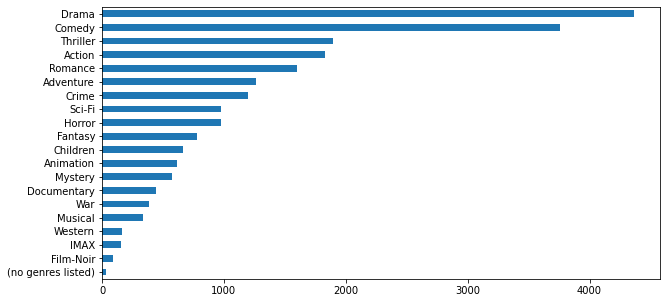

In [45]:
#plotando gráfico horizontal dos dados acima
genero.plot(kind= 'barh' , figsize= (10,5), fontsize = 10 )
plt.show()

## Desafio 1 do [Paulo Silveira](https://twitter.com/paulo_caelum)

O Paulo fez uma análise rápida e disse que tem 18 filmes sem avaliações, será que ele acertou?

Determine quantos filmes não tem avaliações e quais são esses filmes.


In [46]:
#filmes sem avaliação (notamedia = NaN) Desafio1
filmes_sem_nota = filmes_com_media[filmes_com_media.nota_media.isnull()]
qtd_filmes_sem_nota = filmes_sem_nota.shape[0] # ou len(filmes_sem_nota)
qtd_filmes_sem_nota

18

In [47]:
filmes_sem_nota.head(qtd_filmes_sem_nota)

,filmeId,titulo,genero,nota_media
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN
4037,5721,"Chosen, The (1981)",Drama,NaN
4506,6668,"Road Home, The (Wo de fu qin mu qin) (1999)",Drama|Romance,NaN
4598,6849,Scrooge (1970),Drama|Fantasy|Musical,NaN
4704,7020,Proof (1991),Comedy|Drama|Romance,NaN
5020,7792,"Parallax View, The (1974)",Thriller,NaN


## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Mudar o nome da coluna nota do dataframe **filmes_com_media** para nota_média após o join.

In [48]:
filmes_com_media = filmes_com_media.rename(columns={'nota': 'nota_media'})
filmes_com_media.head(20)

,filmeId,titulo,genero,nota_media
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
5,6,Heat (1995),Action|Crime|Thriller,3.95
6,7,Sabrina (1995),Comedy|Romance,3.19
7,8,Tom and Huck (1995),Adventure|Children,2.88
8,9,Sudden Death (1995),Action,3.12
9,10,GoldenEye (1995),Action|Adventure|Thriller,3.50


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Colocar o número de avaliações por filme, isto é, não só a média mas o TOTAL de votos por filme.

In [49]:
filmes_qtd_avaliacoes = filmes_qtd_avaliacoes.rename(columns={'nota': 'qtd_avaliacoes', 'gener': 'genero'})
filmes_qtd_avaliacoes = filmes_qtd_avaliacoes.sort_values('qtd_avaliacoes', ascending= False)
filmes_qtd_avaliacoes[:20]

,filmeId,titulo,genero,nota_media,qtd_avaliacoes
314,356,Forrest Gump (1994),Comedy|Drama|Romance|War,4.16,329
277,318,"Shawshank Redemption, The (1994)",Crime|Drama,4.43,317
257,296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,4.20,307
510,593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,4.16,279
1939,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.19,278
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,4.23,251
418,480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,3.75,238
97,110,Braveheart (1995),Action|Drama|War,4.03,237
507,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,3.97,224
461,527,Schindler's List (1993),Drama|War,4.22,220


## Desafio 4 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Arredondar as médias (coluna de nota média) para duas casas decimais.

In [50]:
filmes_com_media = filmes.join(nota_media_por_filme, on= 'filmeId').round(2)
filmes_com_media

,filmeId,titulo,gener,nota
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50
9739,193585,Flint (2017),Drama,3.50
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50


## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Descobrir os generos dos filmes (quais são eles, únicos). (esse aqui o bicho pega)

In [51]:
lista_filmes = list(filmes["gener"].str.get_dummies(sep="|").columns)
lista_filmes

['(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Contar o número de aparições de cada genero.

In [52]:
genero = filmes["gener"].str.get_dummies(sep="|").sum().sort_values(ascending = False)
genero

Drama                 4361
Comedy                3756
Thriller              1894
Action                1828
Romance               1596
Adventure             1263
Crime                 1199
Sci-Fi                 980
Horror                 978
Fantasy                779
Children               664
Animation              611
Mystery                573
Documentary            440
War                    382
Musical                334
Western                167
IMAX                   158
Film-Noir               87
(no genres listed)      34
dtype: int64

## Desafio 7 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Plotar o gráfico de aparições de cada genero. Pode ser um gráfico de tipo igual a barra.

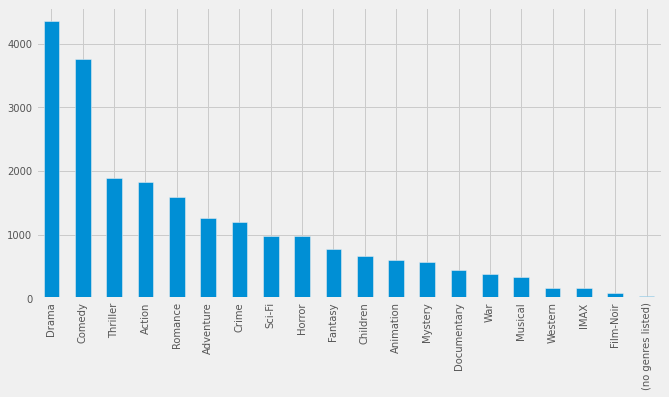

In [159]:
genero.plot(kind= 'bar' , figsize= (10,5), fontsize = 10 )
plt.show()

#Aula 2


In [54]:
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


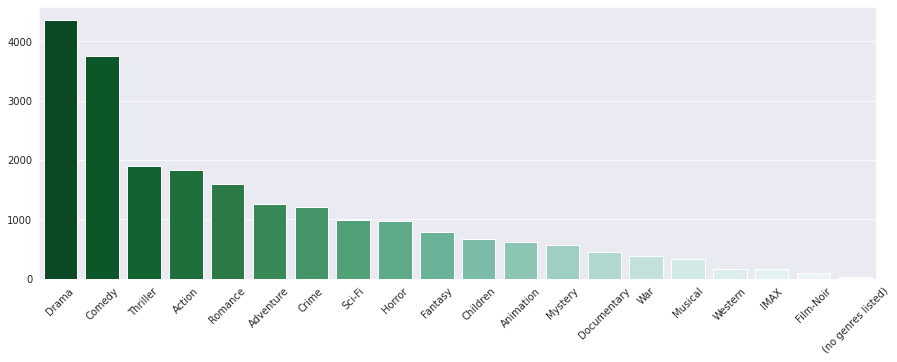

In [55]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))

sns.barplot(x=genero.index, y=genero.values,
            palette=sns.color_palette("BuGn_r",
            n_colors=len((genero)+5)))
plt.xticks(rotation='45')
plt.show()


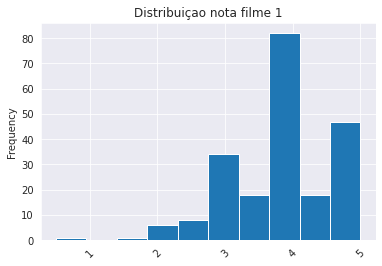

In [56]:
filme1 = avaliacoes.query('filmeId == 1').nota
filme1.plot(kind= 'hist',
            title= 'Distribuiçao nota filme 1')
plt.xticks(rotation=45) 
plt.show()

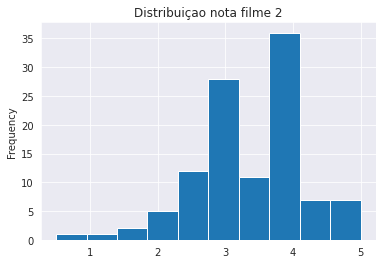

In [57]:
avaliacoes.query('filmeId == 2').nota.plot(kind= 'hist')
plt.title('Distribuiçao nota filme 2')
plt.show()

In [58]:
filmes_com_media.sort_values("nota", ascending=False)[2450:2500]

,filmeId,titulo,gener,nota
8765,128620,Victoria (2015),Crime|Drama|Romance,3.90
599,745,Wallace & Gromit: A Close Shave (1995),Animation|Children|Comedy,3.90
5480,26258,"Topo, El (1970)",Fantasy|Western,3.90
4795,7143,"Last Samurai, The (2003)",Action|Adventure|Drama|War,3.90
5451,26084,"Music Man, The (1962)",Children|Comedy|Musical|Romance,3.90
3016,4034,Traffic (2000),Crime|Drama|Thriller,3.90
4100,5876,"Quiet American, The (2002)",Drama|Thriller|War,3.90
2894,3871,Shane (1953),Drama|Western,3.90
6580,55247,Into the Wild (2007),Action|Adventure|Drama,3.90
2156,2871,Deliverance (1972),Adventure|Drama|Thriller,3.90


In [0]:
def plot_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  return notas_do_filme.describe()

count    92.000000
mean      3.880435
std       1.025418
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: nota, dtype: float64

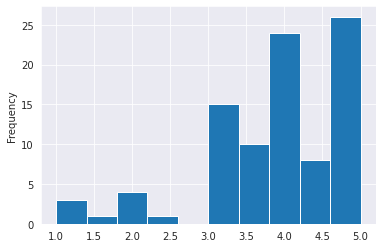

In [60]:
plot_filme(919)

count    8.00000
mean     3.50000
std      0.46291
min      3.00000
25%      3.37500
50%      3.50000
75%      3.50000
max      4.50000
Name: nota, dtype: float64

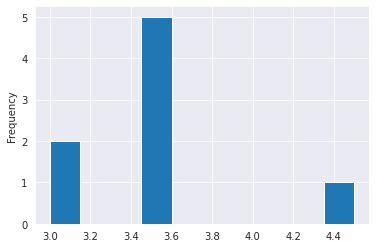

In [61]:
plot_filme(4508)

In [0]:
def plotbox_filme(n):
  notas_do_filme = avaliacoes.query(f"filmeId=={n}")["nota"]
  notas_do_filme.plot(kind='hist')
  plt.show()
  print('\n')
  notas_do_filme.plot.box()
  plt.show()
  return notas_do_filme.describe()

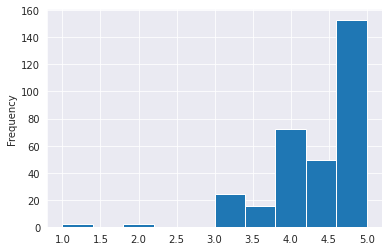

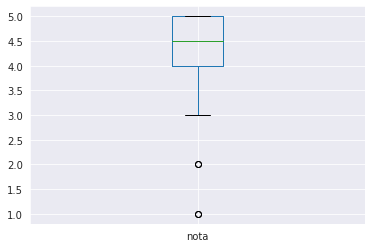

count    317.000000
mean       4.429022
std        0.713019
min        1.000000
25%        4.000000
50%        4.500000
75%        5.000000
max        5.000000
Name: nota, dtype: float64

In [63]:
plotbox_filme(318)

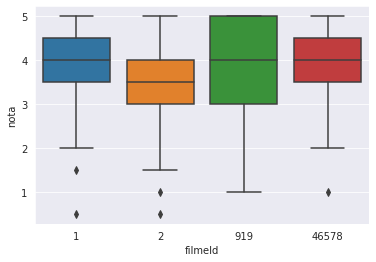

In [64]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

##Desafio 1 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

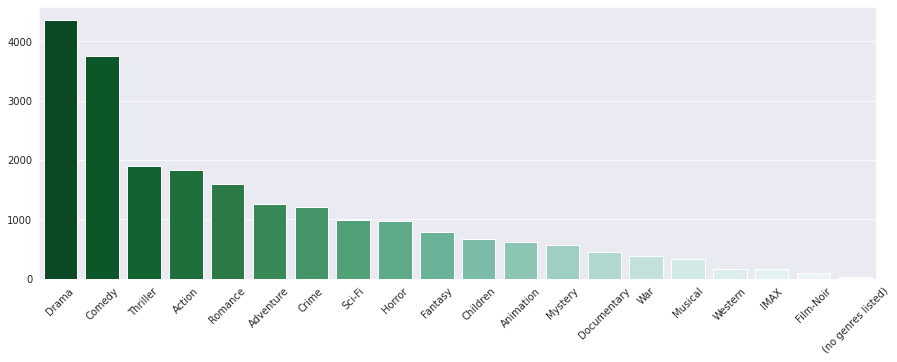

In [65]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))

sns.barplot(x=genero.index, y=genero.values,
            palette=sns.color_palette("BuGn_r",
            n_colors=len((genero)+5)))
plt.xticks(rotation='45')
plt.show()


## Desafio 2 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Encontar vários filmes com médias próximas e distribuições diferentes, use a função **plot_filmes(n)** para plotar.

## Desafio 3 do [Paulo Silveira](https://twitter.com/paulo_caelum)

 Criar o boxplot dos 10 filmes com mais votos (não é com maior média, é com mais votos!). Não apenas plot mas também analise e tente tirar conclusões.

In [66]:
list_top10_avaliacoes = avaliacoes.groupby('filmeId').size().sort_values(ascending=False)[0:10]
list_top10_avaliacoes

filmeId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
dtype: int64

In [67]:
top10filmes_qtd_avaliacoes = avaliacoes[avaliacoes['filmeId'].isin(list_top10_avaliacoes.index)]
top10filmes_qtd_avaliacoes

,usuarioId,filmeId,nota,momento
7,1,110,4.0,964982176
15,1,260,5.0,964981680
16,1,296,3.0,964982967
20,1,356,4.0,964980962
26,1,480,4.0,964982346
...,...,...,...,...
99569,610,480,5.0,1479545821
99571,610,527,3.5,1479545826
99573,610,589,5.0,1479542983
99575,610,593,4.5,1479545819


In [68]:
top10filmes_qtd_avaliacoes = pd.merge(top10filmes_qtd_avaliacoes, filmes, on='filmeId', how= 'left')
top10filmes_qtd_avaliacoes

,usuarioId,filmeId,nota,momento,titulo,gener
0,1,110,4.0,964982176,Braveheart (1995),Action|Drama|War
1,1,260,5.0,964981680,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
2,1,296,3.0,964982967,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,1,356,4.0,964980962,Forrest Gump (1994),Comedy|Drama|Romance|War
4,1,480,4.0,964982346,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...
2675,610,480,5.0,1479545821,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller
2676,610,527,3.5,1479545826,Schindler's List (1993),Drama|War
2677,610,589,5.0,1479542983,Terminator 2: Judgment Day (1991),Action|Sci-Fi
2678,610,593,4.5,1479545819,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller


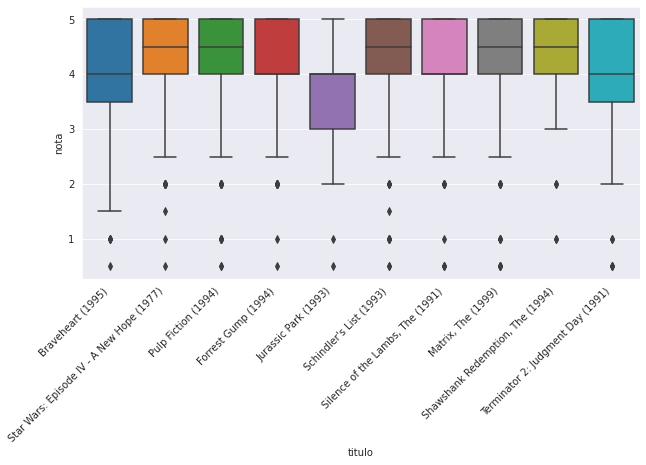

In [69]:
plt.figure(figsize = (10,5))
sns.boxplot(data = top10filmes_qtd_avaliacoes , x ="titulo", y="nota")
plt.xticks(rotation = 45, horizontalalignment="right")

plt.show()

## Desafio 4 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

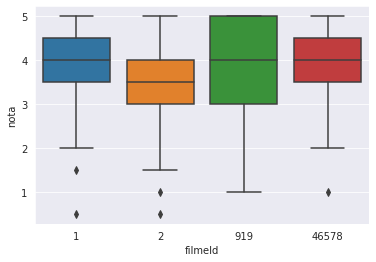

In [70]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")

## Desafio 5 do [Allan Spadini](https://twitter.com/allanspadini)

Calcular moda, média e mediana dos filmes. Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [71]:
#criando Df adicionando moda e mediana
filmes_stats = filmes_com_media.rename(columns={'nota':'nota_media'})
mediana_mode_filmes = avaliacoes.groupby('filmeId')['nota'].agg([pd.Series.mode,'median'])
filmes_stats = filmes_stats.join(mediana_mode_filmes,on='filmeId')
filmes_stats

,filmeId,titulo,gener,nota_media,mode,median
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4,4.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,4,3.5
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3,3.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3,3.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,3,3.0
...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,4,4.0
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,3.5,3.5
9739,193585,Flint (2017),Drama,3.50,3.5,3.5
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,3.5,3.5


**Media, Moda e Mediana 
critério = proximas de 0.5** 

In [72]:
filmes_stats_low = filmes_stats.query('nota_media > 0.4 & nota_media <= 0.5').head(3)
filmes_stats_low.head()

,filmeId,titulo,gener,nota_media,mode,median
2689,3604,Gypsy (1962),Musical,0.5,0.5,0.5
2933,3933,"Killer Shrews, The (1959)",Horror|Sci-Fi,0.5,0.5,0.5
3027,4051,Horrors of Spider Island (Ein Toter Hing im Ne...,Horror|Sci-Fi,0.5,0.5,0.5


**Media, Moda e Mediana 
critério = proximas de 3**

In [73]:
filmes_stats_med = filmes_stats.query('nota_media > 2.8 & nota_media < 3').head(3)
filmes_stats_med.head()

,filmeId,titulo,gener,nota_media,mode,median
7,8,Tom and Huck (1995),Adventure|Children,2.88,3,3.0
82,93,Vampire in Brooklyn (1995),Comedy|Horror|Romance,2.83,3,3.0
112,132,Jade (1995),Thriller,2.83,3,3.0


**Media, Moda e Mediana 
critério = proximas de 5**

In [74]:
filmes_stats_high = filmes_stats.query('nota_media > 4.8 & nota_media < 5').head(3)
filmes_stats_high.head()

,filmeId,titulo,gener,nota_media,mode,median
4396,6460,"Trial, The (Procès, Le) (1962)",Drama,4.90,5,5.0
5580,26810,Bad Boy Bubby (1993),Drama,4.83,5,5.0
8536,115122,What We Do in the Shadows (2014),Comedy|Horror,4.83,5,5.0


## Desafio 6 da [Thais André](https://twitter.com/thais_tandre)

Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).


In [0]:
def plot_hist_box(n):
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.title(f"Avaliações do filme id{n}")
    avaliacoes.query(f"filmeId == {n}")["nota"].plot(kind = 'hist')
    plt.subplot(1,2,2)
    avaliacoes.query(f"filmeId == {n}")["nota"].plot.box()
    plt.show()


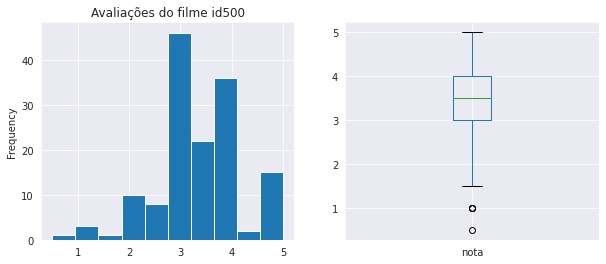

In [76]:
plot_hist_box(500)

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [77]:
filmes['titulo'].str.extract(r'\((\d{4})\)$', expand=True)

,0
0,1995
1,1995
2,1995
3,1995
4,1995
...,...
9737,2017
9738,2017
9739,2017
9740,2018


In [0]:
#extraindo os anos da coluna titulo utilizando método ReGex
filmes_com_media['ano'] = filmes['titulo'].str.extract('\((\d+)\)$')

In [79]:
#Removendo filmes que nao tem ano ou não foi possível extrair através do método usado acima
filmes_com_media.dropna()

,filmeId,titulo,gener,nota,ano
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,1995
4,5,Father of the Bride Part II (1995),Comedy,3.07,1995
...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,4.00,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,3.50,2017
9739,193585,Flint (2017),Drama,3.50,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,3.50,2018


In [80]:
filmes_com_media.groupby('ano').nota.mean()


ano
1902    3.500000
1903    2.500000
1908    4.000000
1915    2.000000
1916    3.562500
          ...   
2014    3.110217
2015    3.069088
2016    3.103624
2017    3.376735
2018    3.372683
Name: nota, Length: 106, dtype: float64

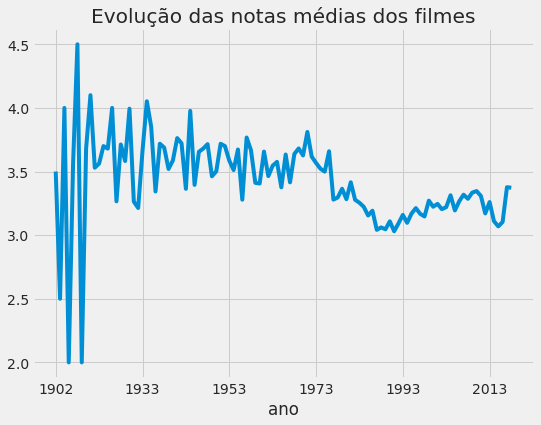

In [81]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(8,6))
media_por_ano = filmes_com_media.groupby('ano')['nota'].mean()
media_por_ano.plot()
plt.title('Evolução das notas médias dos filmes')
plt.show()

# Aula 3

In [0]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [0]:
#importando dados do imdb salvos no github
imdb = pd.read_csv('https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv')

In [84]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


##Explorando os dados

In [160]:
# verificando dados únicos (classes) dentro da coluna color
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [86]:
# quantidade de filmes para cada classe/coluna (color), sem contar filmes com dados faltantes nesta coluna
imdb['color'].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [87]:
# desta vez com parametro normalize retornando o valor em porcentagem do total, ainda desconsiderando valores faltantes
imdb['color'].value_counts(normalize= True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [164]:
#value_counts possui o parametro dropna= True como padrão, quando False retorna também a quantidade de dados faltantes
imdb['color'].value_counts(dropna= False)

Color               4772
 Black and White     207
NaN                   19
Name: color, dtype: int64

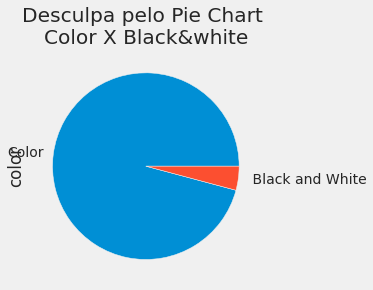

In [88]:
#plotando um gráfico de pizza com a quantidade relativa (normalized = True) da classe color 
imdb.color.value_counts(normalize= True).plot(kind= 'pie')
plt.title('Desculpa pelo Pie Chart \nColor X Black&white')
plt.show()

In [89]:
#contagem por diretor
imdb['director_name'].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
P.J. Hogan           1
John Reinhardt       1
David Anspaugh       1
Martin Koolhoven     1
Caryn Waechter       1
Name: director_name, Length: 2398, dtype: int64

In [90]:
#observando os tipos das colunas com método info
imdb.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [0]:
plt.style.use('ggplot')

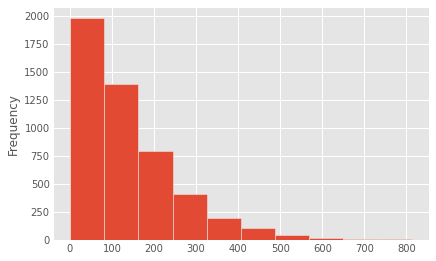

In [92]:
#distribuição
imdb['num_critic_for_reviews'].plot(kind='hist')
plt.show()

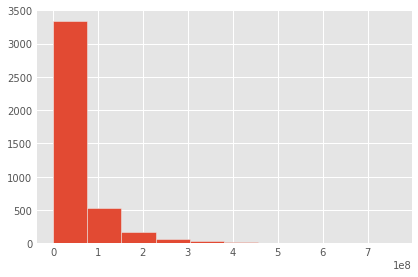

In [93]:
#distribuição da arrecadacão/faturado
imdb['gross'].hist()

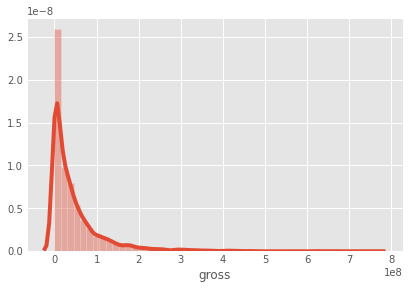

In [94]:
#distribuição com seaborn
sns.distplot(imdb['gross'])
plt.show()

In [95]:
imdb.sort_values('gross', ascending= False).head().drop_duplicates()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


In [96]:
#verificando quantidade de filmes duplicados
imdb.duplicated().sum()

45

In [97]:
#retornando df com os filmes duplicados
imdb[imdb.duplicated()].head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
137,Color,David Yates,248.0,110.0,282.0,103.0,Alexander Skarsgård,11000.0,124051759.0,Action|Adventure|Drama|Romance,Christoph Waltz,The Legend of Tarzan,42372,21175,Casper Crump,2.0,africa|capture|jungle|male objectification|tarzan,http://www.imdb.com/title/tt0918940/?ref_=fn_t...,239.0,English,USA,PG-13,180000000.0,2016.0,10000.0,6.6,2.35,29000
187,Color,Bill Condon,322.0,115.0,386.0,12000.0,Kristen Stewart,21000.0,292298923.0,Adventure|Drama|Fantasy|Romance,Robert Pattinson,The Twilight Saga: Breaking Dawn - Part 2,185394,59177,Taylor Lautner,3.0,battle|friend|super strength|vampire|vision,http://www.imdb.com/title/tt1673434/?ref_=fn_t...,329.0,English,USA,PG-13,120000000.0,2012.0,17000.0,5.5,2.35,65000
204,Color,Hideaki Anno,1.0,120.0,28.0,12.0,Shin'ya Tsukamoto,544.0,NaN,Action|Adventure|Drama|Horror|Sci-Fi,Mark Chinnery,Godzilla Resurgence,374,699,Atsuko Maeda,0.0,blood|godzilla|monster|sequel,http://www.imdb.com/title/tt4262980/?ref_=fn_t...,13.0,Japanese,Japan,NaN,NaN,2016.0,106.0,8.2,2.35,0
303,Color,Joe Wright,256.0,111.0,456.0,394.0,Cara Delevingne,20000.0,34964818.0,Adventure|Family|Fantasy,Hugh Jackman,Pan,39956,21393,Nonso Anozie,4.0,1940s|child hero|fantasy world|orphan|referenc...,http://www.imdb.com/title/tt3332064/?ref_=fn_t...,186.0,English,USA,PG,150000000.0,2015.0,548.0,5.8,2.35,24000
389,Color,Josh Trank,369.0,100.0,128.0,78.0,Reg E. Cathey,596.0,56114221.0,Action|Adventure|Sci-Fi,Tim Blake Nelson,Fantastic Four,110486,1261,Tim Heidecker,3.0,box office flop|critically bashed|portal|telep...,http://www.imdb.com/title/tt1502712/?ref_=fn_t...,695.0,English,USA,PG-13,120000000.0,2015.0,360.0,4.3,2.35,41000


In [98]:
#conferindo quantidade de duplicados no df retornado acima
imdb[imdb.duplicated()].shape[0]

45

In [99]:
#retornando filme(s) aleatorio(s)
imdb.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2728,Color,Brad Anderson,150.0,111.0,122.0,25.0,Eduardo Noriega,918.0,2203641.0,Crime|Drama|Mystery|Thriller,Thomas Kretschmann,Transsiberian,42792,1252,Mac McDonald,0.0,35 mm digital camera|drugs|murder|train|travel,http://www.imdb.com/title/tt0800241/?ref_=fn_t...,162.0,English,Spain,R,15000000.0,2008.0,278.0,6.7,2.35,0
552,Color,Jerry Zucker,53.0,134.0,109.0,249.0,Ben Cross,919.0,37600435.0,Action|Adventure|Romance|Thriller,Julia Ormond,First Knight,55350,1695,John Gielgud,3.0,battle|king|king arthur|knight|marriage,http://www.imdb.com/title/tt0113071/?ref_=fn_t...,180.0,English,USA,PG-13,55000000.0,1995.0,303.0,5.9,1.85,0
3745,Color,Fred Walton,96.0,89.0,17.0,85.0,Deborah Foreman,690.0,12947763.0,Horror|Mystery,Thomas F. Wilson,April Fool's Day,10624,1160,Clayton Rohner,0.0,april fool's day|island|mansion|psycho|secret,http://www.imdb.com/title/tt0090655/?ref_=fn_t...,125.0,English,USA,R,5000000.0,1986.0,190.0,6.2,2.35,0
2201,Color,Anton Corbijn,333.0,105.0,210.0,101.0,Thekla Reuten,978.0,35596227.0,Crime|Drama|Thriller,Violante Placido,The American,79461,1454,Filippo Timi,1.0,ambush|assassin|priest|prostitute|sweden,http://www.imdb.com/title/tt1440728/?ref_=fn_t...,463.0,English,USA,R,20000000.0,2010.0,191.0,6.3,2.35,10000
3069,Color,Tobe Hooper,223.0,120.0,365.0,723.0,Zelda Rubinstein,887.0,76600000.0,Fantasy|Horror,Heather O'Rourke,Poltergeist,105448,3876,Craig T. Nelson,0.0,ghost|haunted|haunting|house|paranormal invest...,http://www.imdb.com/title/tt0084516/?ref_=fn_t...,321.0,English,USA,PG,10700000.0,1982.0,770.0,7.4,2.35,11000


##Perguntas gerais
- Aventura tem nota melhor que comédia?
- Diretor com mais filmes tem nota melhor? tem mais faturamento?
- As respostas são específicas para a amostra ou para o mundo?
- Quais correlações existem entre os dados
- budge x gross (orçamento x faturamento)
- title_year com algo


In [100]:
imdb.color.unique()



array(['Color', nan, ' Black and White'], dtype=object)

In [101]:
#criando um novo df para retornar apenas os valores Color e Black and White, sem os valores NA
#verificando o tamanho do df 
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
len(color_or_bw)

5024

In [102]:
#adicionando uma coluna no df criado com valores 0 ou 1 
# 
color_or_bw['color_0_ou_1'] = (color_or_bw['color'] == 'Color') * 1
color_or_bw.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


###Experimentações rapidas

In [103]:
#contando quantidade de Na na coluna color
imdb['color'].isnull().sum()

19

In [104]:
#conferindo. o df 'color_or_bw' criado tem 19 registros a menos que o df original 'imdb'
#que foi a quant
print("O df original 'imdb' tem:", imdb.shape[0] , 'e', imdb['color'].isnull().sum(), 'registros nulos (NaN).')
print("Enquanto o df 'color_or_bw' criado tem: ", len(color_or_bw) , 'registros.')


O df original 'imdb' tem: 5043 e 19 registros nulos (NaN).
Enquanto o df 'color_or_bw' criado tem:  5024 registros.


In [105]:
#Comportamento de Booleanos * 1

print('True * 1 =', True * 1)
print('False * 1 = ', False * 1)

True * 1 = 1
False * 1 =  0


##analises

In [106]:
color_or_bw['color_0_ou_1'].value_counts()

1    4815
0     209
Name: color_0_ou_1, dtype: int64

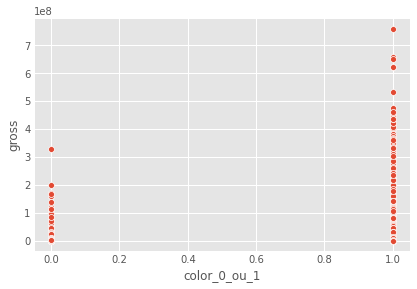

In [107]:
sns.scatterplot(data=color_or_bw,
                x= 'color_0_ou_1',
                y= 'gross')
plt.show()

In [108]:
#média de lucro por cor
color_or_bw.groupby('color').mean()['gross']

color
 Black and White    3.245702e+07
Color               4.902619e+07
Name: gross, dtype: float64

In [109]:
#média de nota por cor
color_or_bw.groupby('color').mean()['imdb_score']

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

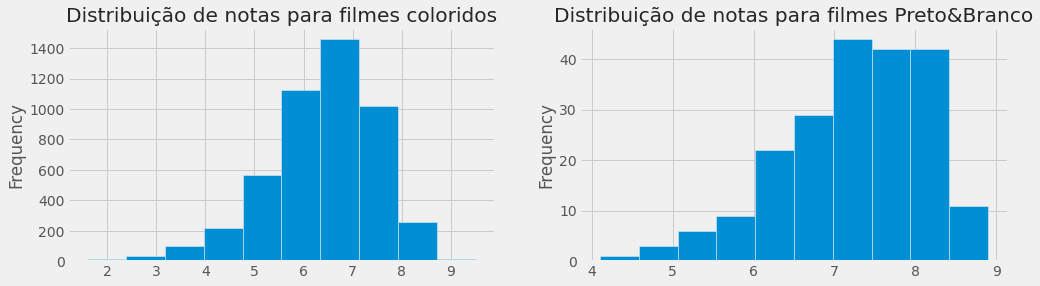

In [110]:

##Plotando gráfico de histograma para observar a distribuição das notas para filmes Coloridos/Preto e Branco
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
color_or_bw.query('color == "Color"')['imdb_score'].plot(kind='hist')
plt.title('Distribuição de notas para filmes coloridos',
          loc='center')
#plt.show()
plt.subplot(1,2,2)
color_or_bw.query('color == " Black and White"')['imdb_score'].plot(kind='hist')
plt.title('Distribuição de notas para filmes Preto&Branco',
          loc='center')
plt.show()


###Desafio1

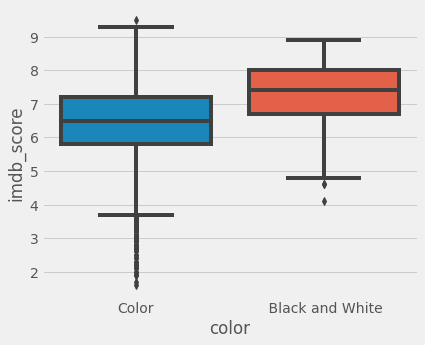

In [111]:
plt.figure(figsize=(6,5))
sns.boxplot( data = color_or_bw, 
            x= "color",
            y= "imdb_score" )
plt.show()

Verificando os pontos máximos e minimos com query apenas para comparar com o que está no gráfico e conferir essas notas outliers.

In [112]:
#nota máx para filme com cor
color_or_bw.query('color == "Color"')['imdb_score'].max()

9.5

In [113]:
#nota mín parafilme com cor
color_or_bw.query('color == "Color"')['imdb_score'].min()

1.6

In [114]:
#nota máx para filme preto e branco
color_or_bw.query('color == " Black and White"')['imdb_score'].max()

8.9

In [115]:
#nota mín para filme preto e branco
color_or_bw.query('color == " Black and White"')['imdb_score'].min()


4.1

Com essas informações e visualizações podemos observar que as notas 'imdb_score' de filmes em preto e branco estão mais concentradas em valores entre 6.5 e 7.0, tendo sua menor nota em 4.1. Enquanto a menor nota para filmes coloridos ficou em 1.6.

Alguns fatores podem ser supostos e um que pode explicar é que. IDMb foi criado em 1990, portanto os filmes mais antigos receberam notas em seus anos de lançamento e nem próxim, mas de pessoas que já ainda hoje escolhem ver este tipo de filme por alguma pretensão e não como filmes mais novos que muita gente vê por expectativa de lançamento, etc. Os filmes antigos/preto&branco que são vistos atualmente são aqueles já com algum prestígio -- os mais relevantes de suas épocas. 

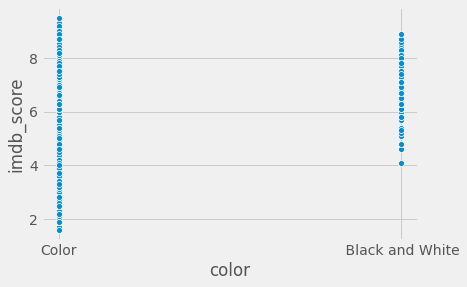

In [116]:
#talvez desnecessario mas observando a mesma coisa com um outro gráfico
sns.scatterplot(data= color_or_bw,
                x= 'color',
                y= 'imdb_score')
plt.show()

##Correlações

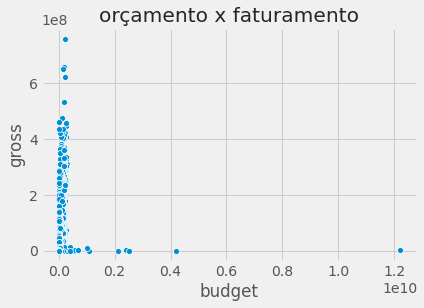

In [117]:
#selecionando apenas as 2 colunas que queremos correlacionar e retiramos valores nulos
budget_gross = imdb[['budget', 'gross']].dropna()
sns.scatterplot(data= budget_gross, x= 'budget', y= 'gross')
plt.title('orçamento x faturamento')
plt.show()



In [0]:
#Talvez fosse esperado que maior orçamento significaria maior faturamento mas essa relação não o que observamos no gráfico acima.
#Este gráfico ficou estranho por alguns motivos e um deles é que os valores dos filmes podem estar em moedas diferentes. Como no filme coreano The Host que é o ponto outlier do grafico acima.

Talvez fosse esperado que maior orçamento significaria maior faturamento mas essa relação não o que observamos no gráfico acima.
Este gráfico ficou estranho por alguns motivos e um deles é que os valores dos filmes podem estar em moedas diferentes. Como no filme coreano The Host que é o ponto outlier do grafico acima.

Para as próximas análises usaremos dados apenas de um país e que será 'USA' para não ter que trabalhar com conversões de moedas e poder compara-lás de maneira correta.

In [119]:
#retirando registros duplicados
imdb.drop_duplicates()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [120]:
#o df retornado tem 4998 rows, enquanto o df anterior tinha 5043, diferença de 45 que é o valor que encontramos no inicio da aula com:
imdb.duplicated().sum()

45

In [0]:
#portanto subescrevendo no df
imdb = imdb.drop_duplicates()

In [122]:
#selecinando dados apenas dos estados unidos
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values('budget', ascending= False).head(10)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
18,Color,Rob Marshall,448.0,136.0,252.0,1000.0,Sam Claflin,40000.0,241063875.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: On Stranger Tides,370704,54083,Stephen Graham,4.0,blackbeard|captain|pirate|revenge|soldier,http://www.imdb.com/title/tt1298650/?ref_=fn_t...,484.0,English,USA,PG-13,250000000.0,2011.0,11000.0,6.7,2.35,58000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
8,Color,Joss Whedon,635.0,141.0,0.0,19000.0,Robert Downey Jr.,26000.0,458991599.0,Action|Adventure|Sci-Fi,Chris Hemsworth,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English,USA,PG-13,250000000.0,2015.0,21000.0,7.5,2.35,118000
10,Color,Zack Snyder,673.0,183.0,0.0,2000.0,Lauren Cohan,15000.0,330249062.0,Action|Adventure|Sci-Fi,Henry Cavill,Batman v Superman: Dawn of Justice,371639,24450,Alan D. Purwin,0.0,based on comic book|batman|sequel to a reboot|...,http://www.imdb.com/title/tt2975590/?ref_=fn_t...,3018.0,English,USA,PG-13,250000000.0,2016.0,4000.0,6.9,2.35,197000
27,Color,Anthony Russo,516.0,147.0,94.0,11000.0,Scarlett Johansson,21000.0,407197282.0,Action|Adventure|Sci-Fi,Robert Downey Jr.,Captain America: Civil War,272670,64798,Chris Evans,0.0,based on comic book|knife|marvel cinematic uni...,http://www.imdb.com/title/tt3498820/?ref_=fn_t...,1022.0,English,USA,PG-13,250000000.0,2016.0,19000.0,8.2,2.35,72000


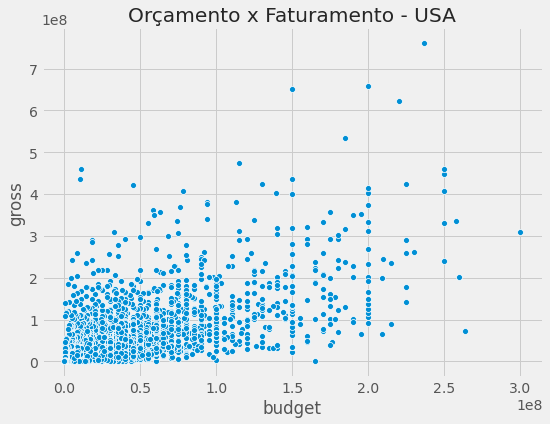

In [123]:
plt.figure(figsize= (8,6))
budget_gross_usa = imdb_usa[['budget', 'gross']].dropna()
sns.scatterplot(data= budget_gross_usa,
                x= 'budget',
                y= 'gross')
plt.title('Orçamento x Faturamento - USA')
plt.show()

Agora sim podemos observar melhor o comportamento entre budget e gross, que não há uma forte correlação mas ainda sim é mais do que no observado no exemplo anterior com todos países. Há uma leve relação positiva.

In [124]:
#Agora criando uma nova coluna-feature Lucro, com os dados ja disponíveis do dataset em outras colunas
# Lucro = valor faturado - valor investido 
imdb_usa['lucro'] = imdb_usa['gross'] - imdb['budget']
imdb_usa.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


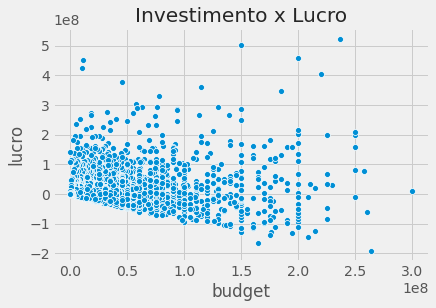

In [125]:
# Plotando gráfico para avaliar correlação entre investimento e lucro.

sns.scatterplot(data= imdb_usa,
                x= 'budget',
                y= 'lucro')
plt.title('Investimento x Lucro')
plt.show()

**Desafio:
Qual filme gastou tanto dinheiro e teve este grande prejuíno observado no gráfico acima?**

In [126]:
imdb_usa.query('lucro < -100000000 & budget > 250000000')[['movie_title', 'title_year']]

,movie_title,title_year
5,John Carter,2012.0


Desafio2:
**Filmes mais recentes tiveram maior prejuízo?**

In [127]:
lucro_year_usa = imdb_usa[['title_year', 'lucro']].dropna()
lucro_year_usa.head()

,title_year,lucro
0,2009.0,523505847.0
1,2007.0,9404152.0
3,2012.0,198130642.0
5,2012.0,-190641321.0
6,2007.0,78530303.0


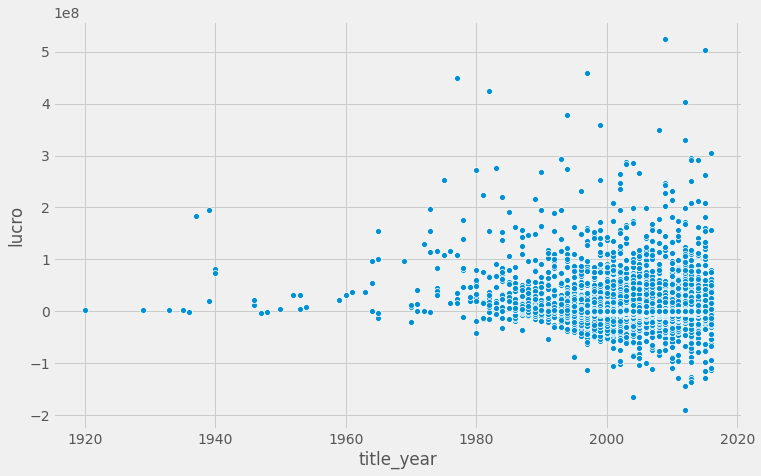

In [128]:
plt.rcParams['figure.figsize'] = (11,7)
fig, ax = plt.subplots()
sns.scatterplot(x= 'title_year',
                y= 'lucro',
                data= lucro_year_usa)
plt.show()

###**Desafio**:
 **Quais foram os filmes pré 2ª guerra que lucraram tanto?**

In [129]:
#Observando o gráfico acima selecionamos com as querys feitas por ano e por lucro e encontramos os filmes que procuramos
filme_preguerra_lucrativos = imdb_usa.query('title_year > 1935 & title_year <= 1939 & lucro > 100000000')[['movie_title','director_name', 'lucro', 'title_year']].sort_values('lucro', ascending= False)
filme_preguerra_lucrativos.head()

,movie_title,director_name,lucro,title_year
3970,Gone with the Wind,Victor Fleming,194678278.0,1939.0
4449,Snow White and the Seven Dwarfs,William Cottrell,182925485.0,1937.0


In [130]:
imdb

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,Eric Mabius,Signed Sealed Delivered,629,2283,Crystal Lowe,2.0,fraud|postal worker|prison|theft|trial,http://www.imdb.com/title/tt3000844/?ref_=fn_t...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,Natalie Zea,The Following,73839,1753,Sam Underwood,1.0,cult|fbi|hideout|prison escape|serial killer,http://www.imdb.com/title/tt2071645/?ref_=fn_t...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,Eva Boehnke,A Plague So Pleasant,38,0,David Chandler,0.0,NaN,http://www.imdb.com/title/tt2107644/?ref_=fn_t...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,Alan Ruck,Shanghai Calling,1255,2386,Eliza Coupe,5.0,NaN,http://www.imdb.com/title/tt2070597/?ref_=fn_t...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [0]:
filmes_por_diretor = imdb_usa['director_name'].value_counts()

In [132]:
gross_filmesirmaos  = imdb_usa[['director_name', 'gross']].set_index('director_name').join(filmes_por_diretor, on= 'director_name').rename(columns={"gross": 'faturamento',"director_name": "qtd_filmes"})
gross_filmesirmaos.head()

,faturamento,qtd_filmes
director_name,,
James Cameron,760505847.0,6.0
Gore Verbinski,309404152.0,7.0
Christopher Nolan,448130642.0,8.0
Andrew Stanton,73058679.0,3.0
Sam Raimi,336530303.0,11.0


In [0]:
#gross_filmesirmaos.columns = ['faturamento', 'filmes_irmaos']
gross_filmesirmaos = gross_filmesirmaos.reset_index()


In [134]:
gross_filmesirmaos.head()

,director_name,faturamento,qtd_filmes
0,James Cameron,760505847.0,6.0
1,Gore Verbinski,309404152.0,7.0
2,Christopher Nolan,448130642.0,8.0
3,Andrew Stanton,73058679.0,3.0
4,Sam Raimi,336530303.0,11.0


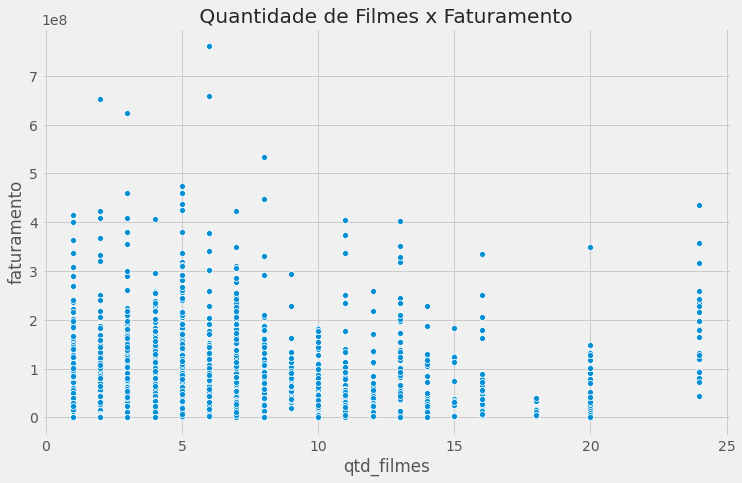

In [135]:
sns.scatterplot(x= 'qtd_filmes',
                y= 'faturamento',
                data= gross_filmesirmaos)
plt.title(' Quantidade de Filmes x Faturamento ')
plt.show()

###Desafio
Confirmar tese que os diretor com quantidade de filmes proximo a 18 e baixo faturamento é o Woody Allen.
E interpretar melhor com outros gráficos. (mudar marcadores)

In [136]:
gross_filmesirmaos.query('qtd_filmes == 18')

,director_name,faturamento,qtd_filmes
1538,Woody Allen,7496522.0,18.0
1737,Woody Allen,16684352.0,18.0
1861,Woody Allen,13383737.0,18.0
1869,Woody Allen,10569071.0,18.0
1872,Woody Allen,9714482.0,18.0
1960,Woody Allen,33404871.0,18.0
1975,Woody Allen,17071230.0,18.0
1993,Woody Allen,3203044.0,18.0
2070,Woody Allen,14792779.0,18.0
2078,Woody Allen,4839383.0,18.0


##Pairplots e analises gráficas de correlação 

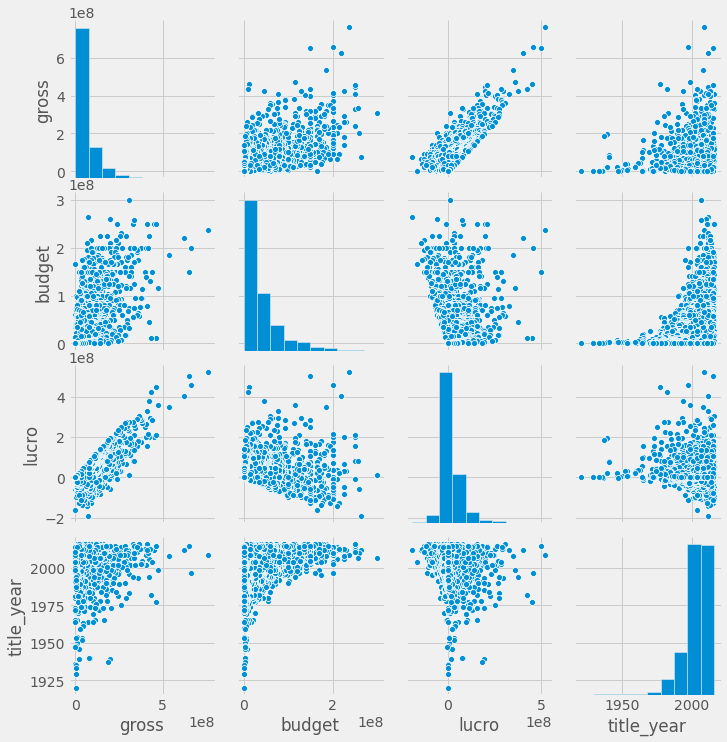

In [137]:
sns.pairplot(data= imdb_usa[['gross', 'budget', 'lucro', 'title_year']].dropna() )
plt.show()

In [138]:
imdb_usa[['gross', 'budget', 'lucro', 'title_year']].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


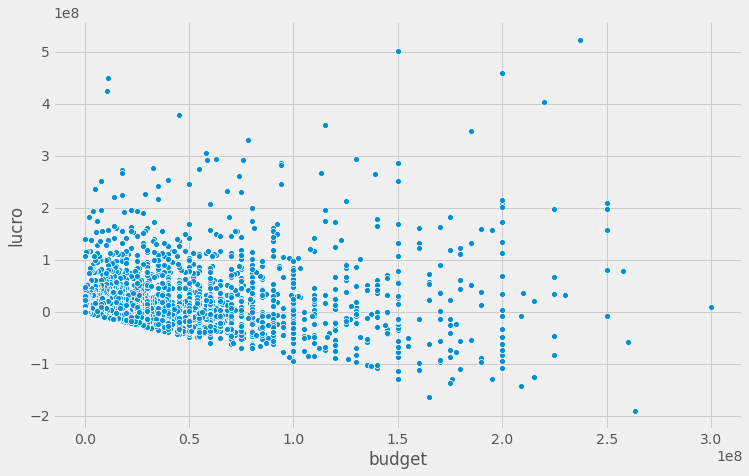

In [139]:
sns.scatterplot(x= 'budget',
           y='lucro',
           data= imdb_usa[['budget', 'lucro']].dropna())

###Desafio
Calcular correlação somente para filmes depois de 2000 e interpretar melhor essa correlação.

In [140]:

imdb_usa.query('title_year >= 2000')[['gross', 'budget', 'lucro', 'title_year']].dropna().corr()

,gross,budget,lucro,title_year
gross,1.000000,0.709233,0.770642,0.110538
budget,0.709233,1.000000,0.097307,0.133872
lucro,0.770642,0.097307,1.000000,0.035039
title_year,0.110538,0.133872,0.035039,1.000000


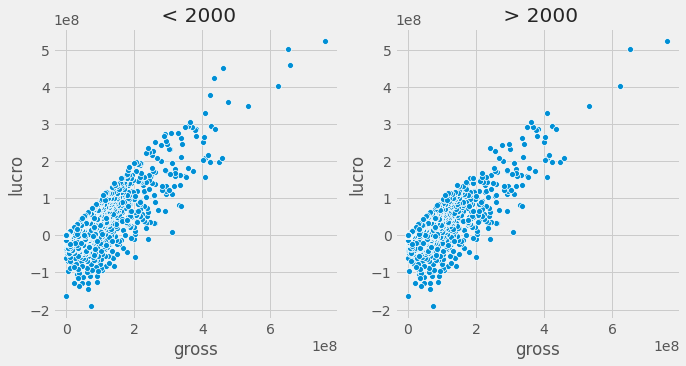

In [141]:
plt.figure(figsize= (10,5))
plt.subplot(1,2,1)
sns.scatterplot(x= 'gross',
           y='lucro',
           data= imdb_usa[['gross', 'lucro']].dropna())
plt.title(' < 2000')

plt.subplot(1,2,2)
sns.scatterplot(x= 'gross',
           y='lucro',
           data= imdb_usa.query('title_year >= 2000')[['gross', 'lucro']].dropna())
plt.title(' > 2000')
#plt.subplot(1,2,2)

plt.show()

Comparando não se pode observar grande diferença na correlação gross x lucro para filmes pré 2000 e pós 2000

###Desafio
Tentar encontrar uma reta

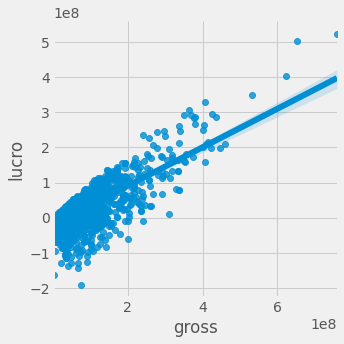

In [142]:
sns.lmplot(x="gross",
           y="lucro",
           data=imdb_usa.query('title_year >= 2000')[['gross', 'lucro']].dropna(),
           robust=False,
           fit_reg = True)
plt.show()

###Desafio
Utilizar também as notas dos filmes para testar correlações. ex: Nº de avaliacoes por ano

In [143]:
imdb_usa.head()


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,523505847.0
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,9404152.0
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,198130642.0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0,78530303.0


In [144]:
imdb_usa[['imdb_score', 'gross', 'budget', 'lucro', 'title_year']].dropna().corr()

,imdb_score,gross,budget,lucro,title_year
imdb_score,1.000000,0.268060,0.070404,0.294858,-0.142182
gross,0.268060,1.000000,0.645673,0.797037,0.048114
budget,0.070404,0.645673,1.000000,0.053455,0.235120
lucro,0.294858,0.797037,0.053455,1.000000,-0.123035
title_year,-0.142182,0.048114,0.235120,-0.123035,1.000000


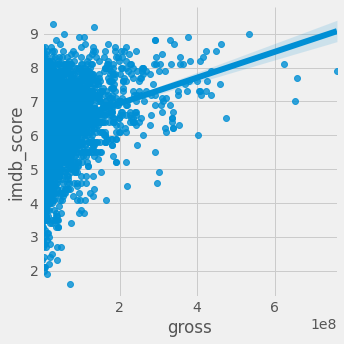

In [145]:
sns.lmplot(x="gross",
           y="imdb_score",
           data= imdb_usa[['imdb_score', 'gross']])
plt.show()

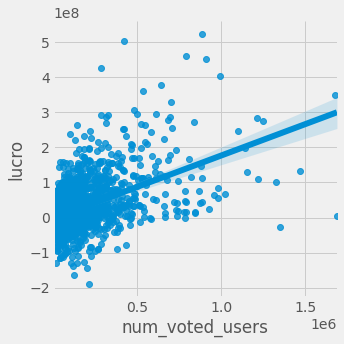

In [146]:
sns.lmplot(x="num_voted_users",
           y="lucro",
           data= imdb_usa[['num_voted_users', 'lucro']].dropna())
plt.show()

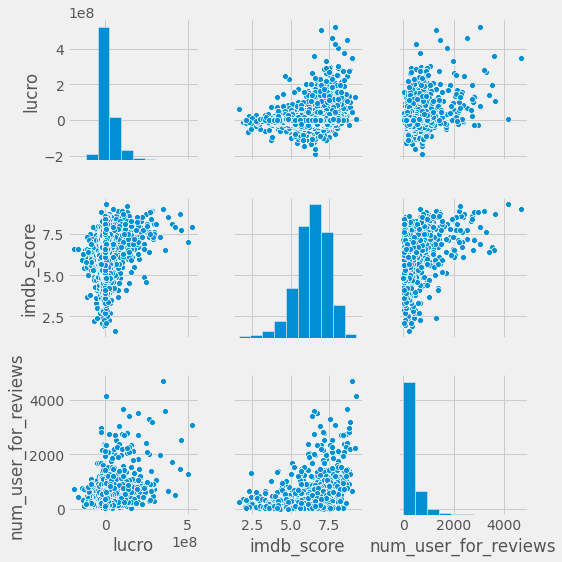

In [147]:
sns.pairplot(data= imdb_usa[['lucro', 'imdb_score', 'num_user_for_reviews', ]].dropna())
plt.show()

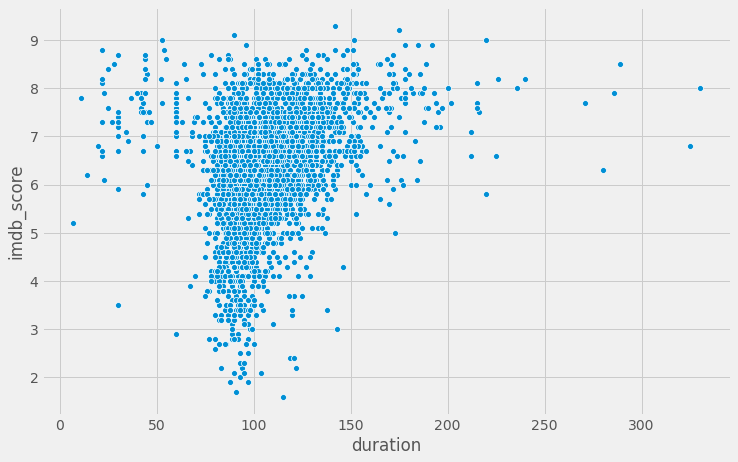

In [148]:
sns.scatterplot(x="duration",
           y="imdb_score",
           data= imdb_usa[['duration', 'imdb_score']].dropna())
plt.show()

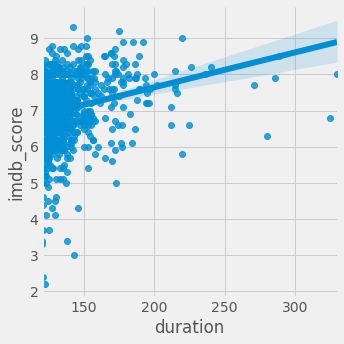

In [149]:
sns.lmplot(x="duration",
           y="imdb_score",
           data= imdb_usa.query('duration >= 120')[['duration', 'imdb_score']].dropna(),
           robust= True)
plt.show()

In [150]:
#2020 - imdb_usa['title_year'] 
#imdb_usa_votes_year= 
imdb_usa_votes_year= imdb_usa[['title_year', 'num_user_for_reviews', 'lucro']]
imdb_usa_votes_year['votes_per_year']=  (imdb_usa_votes_year['num_user_for_reviews']/(2020 - imdb_usa_votes_year['title_year'])) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [151]:
imdb_usa_votes_year.dropna().sort_values(by= 'votes_per_year', ascending= False)

,title_year,num_user_for_reviews,lucro,votes_per_year
10,2016.0,3018.0,80249062.0,754.500000
96,2014.0,2725.0,22991439.0,454.166667
66,2008.0,4667.0,348316061.0,388.916667
15,2013.0,2536.0,66021565.0,362.285714
3,2012.0,2701.0,198130642.0,337.625000
...,...,...,...,...
4904,2008.0,2.0,15185.0,0.166667
4503,2007.0,2.0,-1192174.0,0.153846
4505,2013.0,1.0,-1196170.0,0.142857
4198,1990.0,2.0,299658.0,0.066667


In [152]:
print('I am back')

I am back


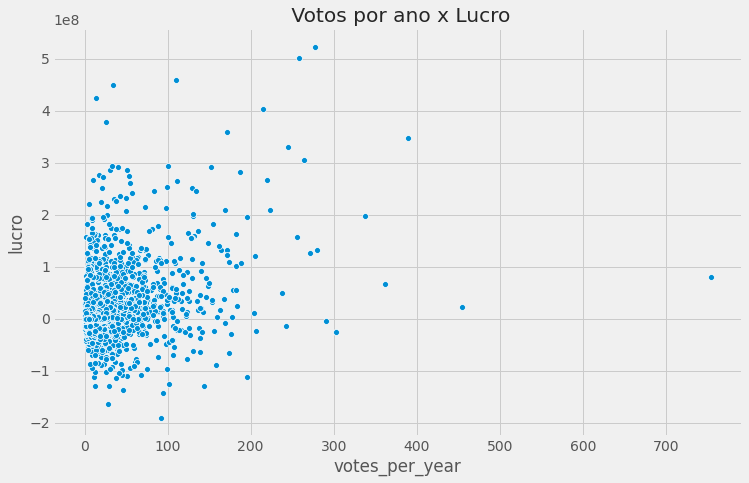

In [153]:
sns.scatterplot(data= imdb_usa_votes_year,
                x= 'votes_per_year',
                y= 'lucro')
plt.title(' Votos por ano x Lucro')
plt.show()

In [154]:
imdb_usa_votes_year[['votes_per_year', 'lucro']].corr()

,votes_per_year,lucro
votes_per_year,1.000000,0.306859
lucro,0.306859,1.000000
